In [ ]:
# %pip install flair flair[word-embeddings]

In [1]:
from flair.datasets import UD_INDONESIAN, UD_ENGLISH
from flair.embeddings import TransformerWordEmbeddings
from flair.models import SequenceTagger
from flair.trainers import ModelTrainer
from typing import List

c:\Users\User\Documents\Code\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
corpus_id = UD_INDONESIAN()
corpus_id

2024-12-26 11:42:08,070 Reading data from C:\Users\User\.flair\datasets\ud_indonesian
2024-12-26 11:42:08,072 Train: C:\Users\User\.flair\datasets\ud_indonesian\id_gsd-ud-train.conllu
2024-12-26 11:42:08,072 Dev: C:\Users\User\.flair\datasets\ud_indonesian\id_gsd-ud-dev.conllu
2024-12-26 11:42:08,072 Test: C:\Users\User\.flair\datasets\ud_indonesian\id_gsd-ud-test.conllu


In [3]:
label_dict = corpus_id.make_label_dictionary(label_type='upos')
print(label_dict)

2024-12-26 11:42:12,439 Computing label dictionary. Progress:


0it [00:00, ?it/s]
4482it [00:00, 30779.98it/s]

2024-12-26 11:42:12,593 Dictionary created for label 'upos' with 17 values: NOUN (seen 21164 times), PROPN (seen 17934 times), PUNCT (seen 13922 times), VERB (seen 9940 times), ADP (seen 9075 times), PRON (seen 5120 times), ADJ (seen 3798 times), NUM (seen 3478 times), DET (seen 2924 times), CCONJ (seen 2867 times), ADV (seen 2852 times), AUX (seen 1786 times), SCONJ (seen 1653 times), PART (seen 837 times), SYM (seen 132 times), X (seen 117 times), INTJ (seen 3 times)
Dictionary with 17 tags: NOUN, PROPN, PUNCT, VERB, ADP, PRON, ADJ, NUM, DET, CCONJ, ADV, AUX, SCONJ, PART, SYM, X, INTJ


In [4]:
embeddings = TransformerWordEmbeddings('bert-base-multilingual-cased')

In [5]:
model = SequenceTagger(hidden_size=256,
                        embeddings=embeddings,
                        tag_dictionary=label_dict,
                        tag_type='upos',
                        use_crf=True)

2024-12-26 11:42:14,427 SequenceTagger predicts: Dictionary with 17 tags: NOUN, PROPN, PUNCT, VERB, ADP, PRON, ADJ, NUM, DET, CCONJ, ADV, AUX, SCONJ, PART, SYM, X, INTJ


In [6]:
trainer = ModelTrainer(model, corpus_id)

In [7]:
trainer.train('../resources/taggers/bert-id-upos',
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=20)

2024-12-26 11:42:16,018 ----------------------------------------------------------------------------------------------------
2024-12-26 11:42:16,019 Model: "SequenceTagger(
  (embeddings): TransformerWordEmbeddings(
    (model): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(119548, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0-11): 12 x BertLayer(
            (attention): BertAttention(
              (self): BertSdpaSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
               

c:\Users\User\Documents\Code\env\lib\site-packages\flair\trainers\trainer.py:545: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=use_amp and flair.device.type != "cpu")
c:\Users\User\Documents\Code\env\lib\site-packages\transformers\models\bert\modeling_bert.py:440: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


2024-12-26 11:42:23,123 epoch 1 - iter 14/141 - loss 3.11835751 - time (sec): 7.09 - samples/sec: 1381.29 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:42:29,272 epoch 1 - iter 28/141 - loss 2.79836146 - time (sec): 13.24 - samples/sec: 1490.88 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:42:35,756 epoch 1 - iter 42/141 - loss 2.45592320 - time (sec): 19.72 - samples/sec: 1509.58 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:42:42,450 epoch 1 - iter 56/141 - loss 2.18514510 - time (sec): 26.41 - samples/sec: 1482.92 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:42:48,795 epoch 1 - iter 70/141 - loss 1.97067653 - time (sec): 32.76 - samples/sec: 1493.49 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:42:54,796 epoch 1 - iter 84/141 - loss 1.79687324 - time (sec): 38.76 - samples/sec: 1515.69 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:43:00,875 epoch 1 - iter 98/141 - loss 1.65751395 - time (sec): 44.84 - samples/sec: 1523.66 - lr: 0.100000 - momentum: 0.000000


100%|██████████| 9/9 [00:04<00:00,  1.88it/s]

2024-12-26 11:43:24,485 DEV : loss 0.4095034599304199 - f1-score (micro avg)  0.8957
2024-12-26 11:43:24,508  - 0 epochs without improvement
2024-12-26 11:43:24,510 saving best model


2024-12-26 11:43:25,395 ----------------------------------------------------------------------------------------------------
2024-12-26 11:43:31,940 epoch 2 - iter 14/141 - loss 0.57703720 - time (sec): 6.54 - samples/sec: 1592.74 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:43:37,760 epoch 2 - iter 28/141 - loss 0.55506335 - time (sec): 12.36 - samples/sec: 1641.59 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:43:45,039 epoch 2 - iter 42/141 - loss 0.53596278 - time (sec): 19.64 - samples/sec: 1554.67 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:43:51,389 epoch 2 - iter 56/141 - loss 0.52720798 - time (sec): 25.99 - samples/sec: 1548.06 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:43:57,658 epoch 2 - iter 70/141 - loss 0.52118697 - time (sec): 32.26 - samples/sec: 1541.30 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:44:03,109 epoch 2 - iter 84/141 - loss 0.51410493 - time (sec): 37.71 - samples/sec: 1559.76 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:44:0

100%|██████████| 9/9 [00:02<00:00,  4.21it/s]


2024-12-26 11:44:31,155 DEV : loss 0.3620067238807678 - f1-score (micro avg)  0.9121
2024-12-26 11:44:31,182  - 0 epochs without improvement
2024-12-26 11:44:31,183 saving best model
2024-12-26 11:44:32,154 ----------------------------------------------------------------------------------------------------
2024-12-26 11:44:38,053 epoch 3 - iter 14/141 - loss 0.41719208 - time (sec): 5.90 - samples/sec: 1567.12 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:44:43,714 epoch 3 - iter 28/141 - loss 0.41831850 - time (sec): 11.56 - samples/sec: 1618.88 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:44:49,922 epoch 3 - iter 42/141 - loss 0.41047719 - time (sec): 17.77 - samples/sec: 1610.49 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:44:55,565 epoch 3 - iter 56/141 - loss 0.40581932 - time (sec): 23.41 - samples/sec: 1628.91 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:45:02,870 epoch 3 - iter 70/141 - loss 0.40773769 - time (sec): 30.71 - samples/sec: 1564.33 - lr: 0.100000

100%|██████████| 9/9 [00:02<00:00,  3.34it/s]


2024-12-26 11:45:38,883 DEV : loss 0.3670254349708557 - f1-score (micro avg)  0.9122
2024-12-26 11:45:38,909  - 0 epochs without improvement
2024-12-26 11:45:38,910 saving best model
2024-12-26 11:45:39,929 ----------------------------------------------------------------------------------------------------
2024-12-26 11:45:46,316 epoch 4 - iter 14/141 - loss 0.33927096 - time (sec): 6.39 - samples/sec: 1546.31 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:45:52,531 epoch 4 - iter 28/141 - loss 0.35873542 - time (sec): 12.60 - samples/sec: 1532.96 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:45:58,750 epoch 4 - iter 42/141 - loss 0.34801062 - time (sec): 18.82 - samples/sec: 1552.12 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:46:04,944 epoch 4 - iter 56/141 - loss 0.34888951 - time (sec): 25.01 - samples/sec: 1553.89 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:46:11,350 epoch 4 - iter 70/141 - loss 0.34506122 - time (sec): 31.42 - samples/sec: 1558.77 - lr: 0.100000

100%|██████████| 9/9 [00:02<00:00,  4.18it/s]


2024-12-26 11:46:46,947 DEV : loss 0.37020641565322876 - f1-score (micro avg)  0.9131
2024-12-26 11:46:46,973  - 0 epochs without improvement
2024-12-26 11:46:46,974 saving best model
2024-12-26 11:46:48,019 ----------------------------------------------------------------------------------------------------
2024-12-26 11:46:54,652 epoch 5 - iter 14/141 - loss 0.31338847 - time (sec): 6.63 - samples/sec: 1465.32 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:47:00,437 epoch 5 - iter 28/141 - loss 0.30462877 - time (sec): 12.42 - samples/sec: 1541.46 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:47:06,577 epoch 5 - iter 42/141 - loss 0.29829384 - time (sec): 18.56 - samples/sec: 1546.56 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:47:13,344 epoch 5 - iter 56/141 - loss 0.29927399 - time (sec): 25.32 - samples/sec: 1536.36 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:47:19,977 epoch 5 - iter 70/141 - loss 0.30322607 - time (sec): 31.96 - samples/sec: 1523.52 - lr: 0.10000

100%|██████████| 9/9 [00:02<00:00,  4.26it/s]


2024-12-26 11:47:55,359 DEV : loss 0.3648667633533478 - f1-score (micro avg)  0.9146
2024-12-26 11:47:55,386  - 0 epochs without improvement
2024-12-26 11:47:55,388 saving best model
2024-12-26 11:47:56,418 ----------------------------------------------------------------------------------------------------
2024-12-26 11:48:03,065 epoch 6 - iter 14/141 - loss 0.26126575 - time (sec): 6.65 - samples/sec: 1501.41 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:48:09,678 epoch 6 - iter 28/141 - loss 0.26179872 - time (sec): 13.26 - samples/sec: 1460.31 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:48:16,004 epoch 6 - iter 42/141 - loss 0.26092196 - time (sec): 19.58 - samples/sec: 1471.99 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:48:21,905 epoch 6 - iter 56/141 - loss 0.26589757 - time (sec): 25.49 - samples/sec: 1496.24 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:48:27,950 epoch 6 - iter 70/141 - loss 0.26854960 - time (sec): 31.53 - samples/sec: 1525.64 - lr: 0.100000

100%|██████████| 9/9 [00:02<00:00,  4.25it/s]


2024-12-26 11:49:03,842 DEV : loss 0.37768933176994324 - f1-score (micro avg)  0.9138
2024-12-26 11:49:03,869  - 1 epochs without improvement
2024-12-26 11:49:03,870 ----------------------------------------------------------------------------------------------------
2024-12-26 11:49:10,055 epoch 7 - iter 14/141 - loss 0.23414835 - time (sec): 6.18 - samples/sec: 1553.70 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:49:17,709 epoch 7 - iter 28/141 - loss 0.24519226 - time (sec): 13.84 - samples/sec: 1438.31 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:49:24,159 epoch 7 - iter 42/141 - loss 0.24662816 - time (sec): 20.29 - samples/sec: 1450.54 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:49:30,862 epoch 7 - iter 56/141 - loss 0.24987219 - time (sec): 26.99 - samples/sec: 1444.78 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:49:38,166 epoch 7 - iter 70/141 - loss 0.25143643 - time (sec): 34.29 - samples/sec: 1433.04 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:49:44

100%|██████████| 9/9 [00:02<00:00,  4.13it/s]


2024-12-26 11:50:11,650 DEV : loss 0.3880316913127899 - f1-score (micro avg)  0.913
2024-12-26 11:50:11,685  - 2 epochs without improvement
2024-12-26 11:50:11,687 ----------------------------------------------------------------------------------------------------
2024-12-26 11:50:18,242 epoch 8 - iter 14/141 - loss 0.21172913 - time (sec): 6.55 - samples/sec: 1527.87 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:50:24,424 epoch 8 - iter 28/141 - loss 0.20968696 - time (sec): 12.73 - samples/sec: 1542.25 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:50:30,569 epoch 8 - iter 42/141 - loss 0.20845688 - time (sec): 18.88 - samples/sec: 1555.41 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:50:36,776 epoch 8 - iter 56/141 - loss 0.21571743 - time (sec): 25.09 - samples/sec: 1554.90 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:50:42,921 epoch 8 - iter 70/141 - loss 0.21456306 - time (sec): 31.23 - samples/sec: 1569.31 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:50:49,5

100%|██████████| 9/9 [00:02<00:00,  4.16it/s]


2024-12-26 11:51:18,767 DEV : loss 0.3835984766483307 - f1-score (micro avg)  0.9151
2024-12-26 11:51:18,793  - 0 epochs without improvement
2024-12-26 11:51:18,794 saving best model
2024-12-26 11:51:20,212 ----------------------------------------------------------------------------------------------------
2024-12-26 11:51:27,546 epoch 9 - iter 14/141 - loss 0.20605031 - time (sec): 7.33 - samples/sec: 1369.23 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:51:34,213 epoch 9 - iter 28/141 - loss 0.19928731 - time (sec): 14.00 - samples/sec: 1430.51 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:51:41,029 epoch 9 - iter 42/141 - loss 0.20314102 - time (sec): 20.81 - samples/sec: 1405.69 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:51:46,935 epoch 9 - iter 56/141 - loss 0.19671620 - time (sec): 26.72 - samples/sec: 1455.40 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:51:53,421 epoch 9 - iter 70/141 - loss 0.19506960 - time (sec): 33.21 - samples/sec: 1462.70 - lr: 0.100000

100%|██████████| 9/9 [00:02<00:00,  4.28it/s]


2024-12-26 11:52:29,222 DEV : loss 0.40138500928878784 - f1-score (micro avg)  0.913
2024-12-26 11:52:29,247  - 1 epochs without improvement
2024-12-26 11:52:29,250 ----------------------------------------------------------------------------------------------------
2024-12-26 11:52:35,605 epoch 10 - iter 14/141 - loss 0.17730560 - time (sec): 6.35 - samples/sec: 1506.94 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:52:42,050 epoch 10 - iter 28/141 - loss 0.18625912 - time (sec): 12.80 - samples/sec: 1518.92 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:52:48,727 epoch 10 - iter 42/141 - loss 0.18445367 - time (sec): 19.48 - samples/sec: 1502.35 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:52:55,055 epoch 10 - iter 56/141 - loss 0.18168420 - time (sec): 25.80 - samples/sec: 1513.68 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:53:01,528 epoch 10 - iter 70/141 - loss 0.18295180 - time (sec): 32.28 - samples/sec: 1493.07 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:5

100%|██████████| 9/9 [00:02<00:00,  4.13it/s]


2024-12-26 11:53:36,759 DEV : loss 0.40063002705574036 - f1-score (micro avg)  0.9136
2024-12-26 11:53:36,784  - 2 epochs without improvement
2024-12-26 11:53:36,785 ----------------------------------------------------------------------------------------------------
2024-12-26 11:53:42,986 epoch 11 - iter 14/141 - loss 0.15247268 - time (sec): 6.20 - samples/sec: 1590.74 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:53:49,319 epoch 11 - iter 28/141 - loss 0.16057134 - time (sec): 12.53 - samples/sec: 1572.49 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:53:54,983 epoch 11 - iter 42/141 - loss 0.16244964 - time (sec): 18.20 - samples/sec: 1602.74 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:54:01,290 epoch 11 - iter 56/141 - loss 0.16250239 - time (sec): 24.50 - samples/sec: 1586.42 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:54:08,641 epoch 11 - iter 70/141 - loss 0.16207964 - time (sec): 31.85 - samples/sec: 1530.48 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:

100%|██████████| 9/9 [00:02<00:00,  3.33it/s]


2024-12-26 11:54:46,061 DEV : loss 0.40885472297668457 - f1-score (micro avg)  0.9129
2024-12-26 11:54:46,089  - 3 epochs without improvement
2024-12-26 11:54:46,092 ----------------------------------------------------------------------------------------------------
2024-12-26 11:54:52,070 epoch 12 - iter 14/141 - loss 0.14543765 - time (sec): 5.98 - samples/sec: 1673.11 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:54:58,791 epoch 12 - iter 28/141 - loss 0.14310925 - time (sec): 12.70 - samples/sec: 1572.36 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:55:05,259 epoch 12 - iter 42/141 - loss 0.14333724 - time (sec): 19.17 - samples/sec: 1545.74 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:55:12,091 epoch 12 - iter 56/141 - loss 0.14690792 - time (sec): 26.00 - samples/sec: 1522.39 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:55:18,046 epoch 12 - iter 70/141 - loss 0.14540920 - time (sec): 31.95 - samples/sec: 1544.83 - lr: 0.100000 - momentum: 0.000000
2024-12-26 11:

100%|██████████| 9/9 [00:02<00:00,  4.27it/s]


2024-12-26 11:55:53,195 DEV : loss 0.4239104986190796 - f1-score (micro avg)  0.913
2024-12-26 11:55:53,219  - 4 epochs without improvement (above 'patience')-> annealing learning_rate to [0.05]
2024-12-26 11:55:53,220 ----------------------------------------------------------------------------------------------------
2024-12-26 11:55:59,849 epoch 13 - iter 14/141 - loss 0.13116161 - time (sec): 6.63 - samples/sec: 1509.12 - lr: 0.050000 - momentum: 0.000000
2024-12-26 11:56:06,058 epoch 13 - iter 28/141 - loss 0.12261140 - time (sec): 12.84 - samples/sec: 1522.74 - lr: 0.050000 - momentum: 0.000000
2024-12-26 11:56:12,807 epoch 13 - iter 42/141 - loss 0.12528482 - time (sec): 19.59 - samples/sec: 1492.30 - lr: 0.050000 - momentum: 0.000000
2024-12-26 11:56:19,854 epoch 13 - iter 56/141 - loss 0.12418597 - time (sec): 26.63 - samples/sec: 1477.66 - lr: 0.050000 - momentum: 0.000000
2024-12-26 11:56:25,685 epoch 13 - iter 70/141 - loss 0.12005521 - time (sec): 32.46 - samples/sec: 1509.

100%|██████████| 9/9 [00:02<00:00,  4.15it/s]


2024-12-26 11:57:00,003 DEV : loss 0.4351210296154022 - f1-score (micro avg)  0.9128
2024-12-26 11:57:00,033  - 1 epochs without improvement
2024-12-26 11:57:00,035 ----------------------------------------------------------------------------------------------------
2024-12-26 11:57:05,919 epoch 14 - iter 14/141 - loss 0.10500538 - time (sec): 5.88 - samples/sec: 1589.22 - lr: 0.050000 - momentum: 0.000000
2024-12-26 11:57:13,414 epoch 14 - iter 28/141 - loss 0.10253289 - time (sec): 13.38 - samples/sec: 1448.63 - lr: 0.050000 - momentum: 0.000000
2024-12-26 11:57:19,464 epoch 14 - iter 42/141 - loss 0.10488866 - time (sec): 19.43 - samples/sec: 1507.08 - lr: 0.050000 - momentum: 0.000000
2024-12-26 11:57:26,340 epoch 14 - iter 56/141 - loss 0.10489731 - time (sec): 26.30 - samples/sec: 1511.00 - lr: 0.050000 - momentum: 0.000000
2024-12-26 11:57:32,647 epoch 14 - iter 70/141 - loss 0.10299065 - time (sec): 32.61 - samples/sec: 1515.84 - lr: 0.050000 - momentum: 0.000000
2024-12-26 11:5

100%|██████████| 9/9 [00:02<00:00,  4.32it/s]


2024-12-26 11:58:06,358 DEV : loss 0.45520609617233276 - f1-score (micro avg)  0.9121
2024-12-26 11:58:06,383  - 2 epochs without improvement
2024-12-26 11:58:06,384 ----------------------------------------------------------------------------------------------------
2024-12-26 11:58:12,799 epoch 15 - iter 14/141 - loss 0.09311920 - time (sec): 6.41 - samples/sec: 1504.33 - lr: 0.050000 - momentum: 0.000000
2024-12-26 11:58:18,944 epoch 15 - iter 28/141 - loss 0.08965538 - time (sec): 12.56 - samples/sec: 1538.75 - lr: 0.050000 - momentum: 0.000000
2024-12-26 11:58:25,081 epoch 15 - iter 42/141 - loss 0.09018938 - time (sec): 18.70 - samples/sec: 1572.74 - lr: 0.050000 - momentum: 0.000000
2024-12-26 11:58:31,818 epoch 15 - iter 56/141 - loss 0.09158302 - time (sec): 25.43 - samples/sec: 1559.33 - lr: 0.050000 - momentum: 0.000000
2024-12-26 11:58:38,657 epoch 15 - iter 70/141 - loss 0.09017572 - time (sec): 32.27 - samples/sec: 1527.43 - lr: 0.050000 - momentum: 0.000000
2024-12-26 11:

100%|██████████| 9/9 [00:02<00:00,  4.08it/s]


2024-12-26 11:59:13,412 DEV : loss 0.4680406153202057 - f1-score (micro avg)  0.912
2024-12-26 11:59:13,440  - 3 epochs without improvement
2024-12-26 11:59:13,441 ----------------------------------------------------------------------------------------------------
2024-12-26 11:59:19,996 epoch 16 - iter 14/141 - loss 0.07412183 - time (sec): 6.55 - samples/sec: 1483.64 - lr: 0.050000 - momentum: 0.000000
2024-12-26 11:59:26,930 epoch 16 - iter 28/141 - loss 0.07750463 - time (sec): 13.49 - samples/sec: 1439.71 - lr: 0.050000 - momentum: 0.000000
2024-12-26 11:59:32,536 epoch 16 - iter 42/141 - loss 0.08283863 - time (sec): 19.09 - samples/sec: 1517.67 - lr: 0.050000 - momentum: 0.000000
2024-12-26 11:59:38,427 epoch 16 - iter 56/141 - loss 0.08369319 - time (sec): 24.98 - samples/sec: 1542.45 - lr: 0.050000 - momentum: 0.000000
2024-12-26 11:59:44,827 epoch 16 - iter 70/141 - loss 0.08330544 - time (sec): 31.38 - samples/sec: 1534.00 - lr: 0.050000 - momentum: 0.000000
2024-12-26 11:59

100%|██████████| 9/9 [00:02<00:00,  4.37it/s]


2024-12-26 12:00:21,300 DEV : loss 0.47180572152137756 - f1-score (micro avg)  0.9127
2024-12-26 12:00:21,329  - 4 epochs without improvement (above 'patience')-> annealing learning_rate to [0.025]
2024-12-26 12:00:21,332 ----------------------------------------------------------------------------------------------------
2024-12-26 12:00:27,394 epoch 17 - iter 14/141 - loss 0.08036051 - time (sec): 6.06 - samples/sec: 1636.02 - lr: 0.025000 - momentum: 0.000000
2024-12-26 12:00:33,321 epoch 17 - iter 28/141 - loss 0.07644412 - time (sec): 11.99 - samples/sec: 1603.68 - lr: 0.025000 - momentum: 0.000000
2024-12-26 12:00:39,356 epoch 17 - iter 42/141 - loss 0.07344651 - time (sec): 18.02 - samples/sec: 1596.97 - lr: 0.025000 - momentum: 0.000000
2024-12-26 12:00:45,747 epoch 17 - iter 56/141 - loss 0.07399799 - time (sec): 24.41 - samples/sec: 1585.31 - lr: 0.025000 - momentum: 0.000000
2024-12-26 12:00:52,102 epoch 17 - iter 70/141 - loss 0.07377417 - time (sec): 30.77 - samples/sec: 15

100%|██████████| 9/9 [00:02<00:00,  4.35it/s]


2024-12-26 12:01:28,571 DEV : loss 0.4809470474720001 - f1-score (micro avg)  0.9126
2024-12-26 12:01:28,597  - 1 epochs without improvement
2024-12-26 12:01:28,598 ----------------------------------------------------------------------------------------------------
2024-12-26 12:01:34,922 epoch 18 - iter 14/141 - loss 0.06530481 - time (sec): 6.32 - samples/sec: 1560.66 - lr: 0.025000 - momentum: 0.000000
2024-12-26 12:01:41,485 epoch 18 - iter 28/141 - loss 0.06661114 - time (sec): 12.89 - samples/sec: 1516.66 - lr: 0.025000 - momentum: 0.000000
2024-12-26 12:01:47,517 epoch 18 - iter 42/141 - loss 0.06859669 - time (sec): 18.92 - samples/sec: 1540.48 - lr: 0.025000 - momentum: 0.000000
2024-12-26 12:01:53,296 epoch 18 - iter 56/141 - loss 0.06722990 - time (sec): 24.70 - samples/sec: 1563.90 - lr: 0.025000 - momentum: 0.000000
2024-12-26 12:01:59,810 epoch 18 - iter 70/141 - loss 0.06722079 - time (sec): 31.21 - samples/sec: 1547.95 - lr: 0.025000 - momentum: 0.000000
2024-12-26 12:0

100%|██████████| 9/9 [00:02<00:00,  4.23it/s]


2024-12-26 12:02:36,127 DEV : loss 0.4914863705635071 - f1-score (micro avg)  0.9121
2024-12-26 12:02:36,154  - 2 epochs without improvement
2024-12-26 12:02:36,155 ----------------------------------------------------------------------------------------------------
2024-12-26 12:02:42,184 epoch 19 - iter 14/141 - loss 0.05694822 - time (sec): 6.03 - samples/sec: 1619.46 - lr: 0.025000 - momentum: 0.000000
2024-12-26 12:02:49,760 epoch 19 - iter 28/141 - loss 0.05943672 - time (sec): 13.60 - samples/sec: 1467.65 - lr: 0.025000 - momentum: 0.000000
2024-12-26 12:02:55,657 epoch 19 - iter 42/141 - loss 0.05863125 - time (sec): 19.50 - samples/sec: 1517.84 - lr: 0.025000 - momentum: 0.000000
2024-12-26 12:03:01,330 epoch 19 - iter 56/141 - loss 0.05997760 - time (sec): 25.17 - samples/sec: 1574.21 - lr: 0.025000 - momentum: 0.000000
2024-12-26 12:03:07,457 epoch 19 - iter 70/141 - loss 0.06035396 - time (sec): 31.30 - samples/sec: 1570.90 - lr: 0.025000 - momentum: 0.000000
2024-12-26 12:0

100%|██████████| 9/9 [00:02<00:00,  4.44it/s]


2024-12-26 12:03:42,038 DEV : loss 0.497707724571228 - f1-score (micro avg)  0.9133
2024-12-26 12:03:42,067  - 3 epochs without improvement
2024-12-26 12:03:42,069 ----------------------------------------------------------------------------------------------------
2024-12-26 12:03:49,461 epoch 20 - iter 14/141 - loss 0.05685687 - time (sec): 7.39 - samples/sec: 1416.29 - lr: 0.025000 - momentum: 0.000000
2024-12-26 12:03:54,993 epoch 20 - iter 28/141 - loss 0.05580780 - time (sec): 12.92 - samples/sec: 1546.43 - lr: 0.025000 - momentum: 0.000000
2024-12-26 12:04:00,822 epoch 20 - iter 42/141 - loss 0.05629146 - time (sec): 18.75 - samples/sec: 1563.37 - lr: 0.025000 - momentum: 0.000000
2024-12-26 12:04:06,994 epoch 20 - iter 56/141 - loss 0.05620067 - time (sec): 24.92 - samples/sec: 1565.68 - lr: 0.025000 - momentum: 0.000000
2024-12-26 12:04:12,977 epoch 20 - iter 70/141 - loss 0.05516524 - time (sec): 30.91 - samples/sec: 1568.19 - lr: 0.025000 - momentum: 0.000000
2024-12-26 12:04

100%|██████████| 9/9 [00:02<00:00,  3.29it/s]


2024-12-26 12:04:48,667 DEV : loss 0.5092757344245911 - f1-score (micro avg)  0.9125
2024-12-26 12:04:48,692  - 4 epochs without improvement (above 'patience')-> annealing learning_rate to [0.0125]
2024-12-26 12:04:50,603 ----------------------------------------------------------------------------------------------------
2024-12-26 12:04:50,605 Loading model from best epoch ...
2024-12-26 12:04:53,565 SequenceTagger predicts: Dictionary with 19 tags: NOUN, PROPN, PUNCT, VERB, ADP, PRON, ADJ, NUM, DET, CCONJ, ADV, AUX, SCONJ, PART, SYM, X, INTJ, <START>, <STOP>


100%|██████████| 9/9 [00:04<00:00,  2.21it/s]

2024-12-26 12:04:57,852 
Results:
- F-score (micro) 0.9352
- F-score (macro) 0.8765
- Accuracy 0.9352

By class:
              precision    recall  f1-score   support

        NOUN     0.8980    0.9141    0.9060      2514
       PROPN     0.9448    0.9177    0.9310      2162
       PUNCT     0.9988    1.0000    0.9994      1623
        VERB     0.9536    0.9316    0.9425      1258
         ADP     0.9629    0.9542    0.9585      1114
        PRON     0.9781    0.9720    0.9751       644
         ADJ     0.7578    0.8463    0.7996       488
         NUM     0.9840    0.9635    0.9737       384
       CCONJ     0.9917    0.9917    0.9917       362
         ADV     0.7781    0.8410    0.8083       346
         DET     0.9572    0.9260    0.9414       338
         AUX     0.9868    0.9782    0.9825       229
       SCONJ     0.8777    0.8505    0.8639       194
        PART     0.9255    0.9775    0.9508        89
         SYM     1.0000    1.0000    1.0000         6
           X     0.000

{'test_score': 0.9351820347056822}

In [8]:
from flair.data import Sentence
text = 'Gamis Pria Dewasa Premium / Jubah Pakistan Polos'.lower()
sentence = Sentence(text)
tag_pos = SequenceTagger.load('../resources/taggers/bert-id-upos/best-model.pt')
tag_pos.predict(sentence)
print(sentence.to_tagged_string())

2024-12-26 12:05:24,296 SequenceTagger predicts: Dictionary with 19 tags: NOUN, PROPN, PUNCT, VERB, ADP, PRON, ADJ, NUM, DET, CCONJ, ADV, AUX, SCONJ, PART, SYM, X, INTJ, <START>, <STOP>
Sentence[8]: "gamis pria dewasa premium / jubah pakistan polos" → ["gamis"/NOUN, "pria"/NOUN, "dewasa"/ADJ, "premium"/ADJ, "/"/PUNCT, "jubah"/NOUN, "pakistan"/NOUN, "polos"/ADJ]


In [9]:
for token in sentence:
    print(f"{token.text} ({token.get_label('upos').value})")

gamis (NOUN)
pria (NOUN)
dewasa (ADJ)
premium (ADJ)
/ (PUNCT)
jubah (NOUN)
pakistan (NOUN)
polos (ADJ)


# 2nd training

In [10]:
import torch

torch.cuda.empty_cache()

In [2]:
corpus_en = UD_ENGLISH()
corpus_en

2024-12-26 12:06:20,047 Reading data from C:\Users\User\.flair\datasets\ud_english
2024-12-26 12:06:20,047 Train: C:\Users\User\.flair\datasets\ud_english\en_ewt-ud-train.conllu
2024-12-26 12:06:20,048 Dev: C:\Users\User\.flair\datasets\ud_english\en_ewt-ud-dev.conllu
2024-12-26 12:06:20,048 Test: C:\Users\User\.flair\datasets\ud_english\en_ewt-ud-test.conllu


In [3]:
label_dict = corpus_en.make_label_dictionary(label_type='upos')
print(label_dict)

2024-12-26 12:06:30,346 Computing label dictionary. Progress:


0it [00:00, ?it/s]
12544it [00:00, 31260.87it/s]

2024-12-26 12:06:30,754 Dictionary created for label 'upos' with 17 values: NOUN (seen 34755 times), PUNCT (seen 23596 times), VERB (seen 22577 times), PRON (seen 18677 times), ADP (seen 17739 times), DET (seen 16299 times), ADJ (seen 13186 times), AUX (seen 12815 times), PROPN (seen 12618 times), ADV (seen 10117 times), CCONJ (seen 6687 times), PART (seen 5748 times), NUM (seen 4127 times), SCONJ (seen 3822 times), SYM (seen 722 times), INTJ (seen 695 times), X (seen 399 times)
Dictionary with 17 tags: NOUN, PUNCT, VERB, PRON, ADP, DET, ADJ, AUX, PROPN, ADV, CCONJ, PART, NUM, SCONJ, SYM, INTJ, X


In [4]:
model_en = SequenceTagger.load("../resources/taggers/bert-id-upos/best-model.pt")
model_en.tag_dictionary = label_dict

2024-12-26 12:06:35,723 SequenceTagger predicts: Dictionary with 19 tags: NOUN, PROPN, PUNCT, VERB, ADP, PRON, ADJ, NUM, DET, CCONJ, ADV, AUX, SCONJ, PART, SYM, X, INTJ, <START>, <STOP>


In [5]:
trainer = ModelTrainer(model_en, corpus_en)

In [6]:
trainer.train('../resources/taggers/bert-multi-upos',
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=20)

2024-12-26 12:06:53,389 ----------------------------------------------------------------------------------------------------
2024-12-26 12:06:53,391 Model: "SequenceTagger(
  (embeddings): TransformerWordEmbeddings(
    (model): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(119548, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0-11): 12 x BertLayer(
            (attention): BertAttention(
              (self): BertSdpaSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
               

c:\Users\User\Documents\Code\env\lib\site-packages\flair\trainers\trainer.py:545: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=use_amp and flair.device.type != "cpu")
c:\Users\User\Documents\Code\env\lib\site-packages\transformers\models\bert\modeling_bert.py:440: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


2024-12-26 12:07:06,546 epoch 1 - iter 39/392 - loss 0.53860306 - time (sec): 13.14 - samples/sec: 1580.05 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:07:20,169 epoch 1 - iter 78/392 - loss 0.46647293 - time (sec): 26.76 - samples/sec: 1559.81 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:07:33,050 epoch 1 - iter 117/392 - loss 0.43079178 - time (sec): 39.65 - samples/sec: 1551.83 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:07:46,397 epoch 1 - iter 156/392 - loss 0.40107138 - time (sec): 52.99 - samples/sec: 1536.92 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:08:00,534 epoch 1 - iter 195/392 - loss 0.38306637 - time (sec): 67.13 - samples/sec: 1534.96 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:08:14,178 epoch 1 - iter 234/392 - loss 0.36972149 - time (sec): 80.77 - samples/sec: 1521.51 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:08:27,608 epoch 1 - iter 273/392 - loss 0.35900889 - time (sec): 94.20 - samples/sec: 1516.74 - lr: 0.100000 - momentum: 0.0

100%|██████████| 32/32 [00:09<00:00,  3.42it/s]


2024-12-26 12:09:18,709 DEV : loss 0.17752447724342346 - f1-score (micro avg)  0.9519
2024-12-26 12:09:18,767  - 0 epochs without improvement
2024-12-26 12:09:18,769 saving best model
2024-12-26 12:09:19,636 ----------------------------------------------------------------------------------------------------
2024-12-26 12:09:33,039 epoch 2 - iter 39/392 - loss 0.20848126 - time (sec): 13.40 - samples/sec: 1493.31 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:09:46,368 epoch 2 - iter 78/392 - loss 0.21180670 - time (sec): 26.73 - samples/sec: 1510.37 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:09:59,406 epoch 2 - iter 117/392 - loss 0.21383576 - time (sec): 39.77 - samples/sec: 1519.80 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:10:13,092 epoch 2 - iter 156/392 - loss 0.21309425 - time (sec): 53.45 - samples/sec: 1521.06 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:10:27,325 epoch 2 - iter 195/392 - loss 0.21328488 - time (sec): 67.69 - samples/sec: 1503.36 - lr: 0.1

100%|██████████| 32/32 [00:04<00:00,  6.97it/s]

2024-12-26 12:11:38,912 DEV : loss 0.1804192066192627 - f1-score (micro avg)  0.9528


2024-12-26 12:11:38,983  - 0 epochs without improvement
2024-12-26 12:11:38,985 saving best model
2024-12-26 12:11:40,006 ----------------------------------------------------------------------------------------------------
2024-12-26 12:11:53,638 epoch 3 - iter 39/392 - loss 0.17042420 - time (sec): 13.63 - samples/sec: 1471.93 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:12:07,664 epoch 3 - iter 78/392 - loss 0.16992502 - time (sec): 27.66 - samples/sec: 1500.94 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:12:21,585 epoch 3 - iter 117/392 - loss 0.16594944 - time (sec): 41.58 - samples/sec: 1465.45 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:12:35,489 epoch 3 - iter 156/392 - loss 0.16648319 - time (sec): 55.48 - samples/sec: 1468.82 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:12:48,583 epoch 3 - iter 195/392 - loss 0.16680419 - time (sec): 68.57 - samples/sec: 1479.61 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:13:02,125 epoch 3 - iter 234/392 - loss 0.168

100%|██████████| 32/32 [00:04<00:00,  6.67it/s]


2024-12-26 12:13:58,896 DEV : loss 0.18402643501758575 - f1-score (micro avg)  0.9529
2024-12-26 12:13:58,953  - 0 epochs without improvement
2024-12-26 12:13:58,955 saving best model
2024-12-26 12:14:00,315 ----------------------------------------------------------------------------------------------------
2024-12-26 12:14:13,587 epoch 4 - iter 39/392 - loss 0.12967384 - time (sec): 13.27 - samples/sec: 1540.36 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:14:27,421 epoch 4 - iter 78/392 - loss 0.13094457 - time (sec): 27.10 - samples/sec: 1503.04 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:14:40,038 epoch 4 - iter 117/392 - loss 0.13197809 - time (sec): 39.72 - samples/sec: 1544.11 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:14:54,228 epoch 4 - iter 156/392 - loss 0.13480166 - time (sec): 53.91 - samples/sec: 1524.29 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:15:07,709 epoch 4 - iter 195/392 - loss 0.13657583 - time (sec): 67.39 - samples/sec: 1516.64 - lr: 0.1

100%|██████████| 32/32 [00:04<00:00,  7.03it/s]


2024-12-26 12:16:18,685 DEV : loss 0.1892516314983368 - f1-score (micro avg)  0.9535
2024-12-26 12:16:18,745  - 0 epochs without improvement
2024-12-26 12:16:18,747 saving best model
2024-12-26 12:16:20,113 ----------------------------------------------------------------------------------------------------
2024-12-26 12:16:33,231 epoch 5 - iter 39/392 - loss 0.11078591 - time (sec): 13.12 - samples/sec: 1555.64 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:16:46,630 epoch 5 - iter 78/392 - loss 0.11296874 - time (sec): 26.52 - samples/sec: 1526.26 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:17:00,059 epoch 5 - iter 117/392 - loss 0.11510087 - time (sec): 39.95 - samples/sec: 1515.98 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:17:14,570 epoch 5 - iter 156/392 - loss 0.11571581 - time (sec): 54.46 - samples/sec: 1487.52 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:17:27,428 epoch 5 - iter 195/392 - loss 0.11440287 - time (sec): 67.31 - samples/sec: 1503.90 - lr: 0.10

100%|██████████| 32/32 [00:04<00:00,  7.13it/s]


2024-12-26 12:18:38,122 DEV : loss 0.19358712434768677 - f1-score (micro avg)  0.9537
2024-12-26 12:18:38,181  - 0 epochs without improvement
2024-12-26 12:18:38,183 saving best model
2024-12-26 12:18:39,532 ----------------------------------------------------------------------------------------------------
2024-12-26 12:18:52,160 epoch 6 - iter 39/392 - loss 0.09574511 - time (sec): 12.63 - samples/sec: 1568.67 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:19:05,098 epoch 6 - iter 78/392 - loss 0.09865125 - time (sec): 25.56 - samples/sec: 1547.77 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:19:18,395 epoch 6 - iter 117/392 - loss 0.09609707 - time (sec): 38.86 - samples/sec: 1540.22 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:19:31,609 epoch 6 - iter 156/392 - loss 0.09531682 - time (sec): 52.07 - samples/sec: 1542.40 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:19:44,662 epoch 6 - iter 195/392 - loss 0.09697599 - time (sec): 65.13 - samples/sec: 1544.82 - lr: 0.1

100%|██████████| 32/32 [00:04<00:00,  7.08it/s]


2024-12-26 12:20:57,282 DEV : loss 0.19802191853523254 - f1-score (micro avg)  0.9524
2024-12-26 12:20:57,341  - 1 epochs without improvement
2024-12-26 12:20:57,342 ----------------------------------------------------------------------------------------------------
2024-12-26 12:21:10,396 epoch 7 - iter 39/392 - loss 0.08300530 - time (sec): 13.05 - samples/sec: 1593.26 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:21:23,473 epoch 7 - iter 78/392 - loss 0.08378769 - time (sec): 26.13 - samples/sec: 1576.79 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:21:36,954 epoch 7 - iter 117/392 - loss 0.09601089 - time (sec): 39.61 - samples/sec: 1569.79 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:21:50,451 epoch 7 - iter 156/392 - loss 0.09423206 - time (sec): 53.11 - samples/sec: 1553.34 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:22:15,202 epoch 7 - iter 195/392 - loss 0.09164217 - time (sec): 77.86 - samples/sec: 1310.20 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:2

100%|██████████| 32/32 [00:06<00:00,  5.32it/s]


2024-12-26 12:24:00,281 DEV : loss 0.2053806483745575 - f1-score (micro avg)  0.953
2024-12-26 12:24:00,338  - 2 epochs without improvement
2024-12-26 12:24:00,340 ----------------------------------------------------------------------------------------------------
2024-12-26 12:24:13,090 epoch 8 - iter 39/392 - loss 0.08081137 - time (sec): 12.75 - samples/sec: 1588.89 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:24:26,508 epoch 8 - iter 78/392 - loss 0.07333407 - time (sec): 26.17 - samples/sec: 1562.73 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:24:40,427 epoch 8 - iter 117/392 - loss 0.07733936 - time (sec): 40.09 - samples/sec: 1513.19 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:24:53,827 epoch 8 - iter 156/392 - loss 0.07513340 - time (sec): 53.49 - samples/sec: 1513.54 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:25:06,907 epoch 8 - iter 195/392 - loss 0.07597523 - time (sec): 66.57 - samples/sec: 1517.09 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:25:

100%|██████████| 32/32 [00:04<00:00,  6.98it/s]


2024-12-26 12:26:18,599 DEV : loss 0.2056199163198471 - f1-score (micro avg)  0.9531
2024-12-26 12:26:18,659  - 3 epochs without improvement
2024-12-26 12:26:18,660 ----------------------------------------------------------------------------------------------------
2024-12-26 12:26:31,552 epoch 9 - iter 39/392 - loss 0.06366010 - time (sec): 12.89 - samples/sec: 1590.72 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:26:44,895 epoch 9 - iter 78/392 - loss 0.06177547 - time (sec): 26.23 - samples/sec: 1570.08 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:26:57,591 epoch 9 - iter 117/392 - loss 0.06365907 - time (sec): 38.93 - samples/sec: 1566.10 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:27:10,222 epoch 9 - iter 156/392 - loss 0.06459295 - time (sec): 51.56 - samples/sec: 1580.13 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:27:22,866 epoch 9 - iter 195/392 - loss 0.06485943 - time (sec): 64.20 - samples/sec: 1580.31 - lr: 0.100000 - momentum: 0.000000
2024-12-26 12:27

100%|██████████| 32/32 [00:04<00:00,  7.03it/s]

2024-12-26 12:28:35,009 DEV : loss 0.21115589141845703 - f1-score (micro avg)  0.9522


2024-12-26 12:28:35,070  - 4 epochs without improvement (above 'patience')-> annealing learning_rate to [0.05]
2024-12-26 12:28:35,072 ----------------------------------------------------------------------------------------------------
2024-12-26 12:28:47,208 epoch 10 - iter 39/392 - loss 0.04593731 - time (sec): 12.13 - samples/sec: 1607.51 - lr: 0.050000 - momentum: 0.000000
2024-12-26 12:29:00,254 epoch 10 - iter 78/392 - loss 0.04336496 - time (sec): 25.18 - samples/sec: 1571.16 - lr: 0.050000 - momentum: 0.000000
2024-12-26 12:29:13,795 epoch 10 - iter 117/392 - loss 0.04287243 - time (sec): 38.72 - samples/sec: 1554.60 - lr: 0.050000 - momentum: 0.000000
2024-12-26 12:29:27,352 epoch 10 - iter 156/392 - loss 0.04309591 - time (sec): 52.28 - samples/sec: 1555.95 - lr: 0.050000 - momentum: 0.000000
2024-12-26 12:29:40,519 epoch 10 - iter 195/392 - loss 0.04308807 - time (sec): 65.45 - samples/sec: 1558.54 - lr: 0.050000 - momentum: 0.000000
2024-12-26 12:29:54,513 epoch 10 - iter 2

100%|██████████| 32/32 [00:04<00:00,  6.86it/s]


2024-12-26 12:30:53,217 DEV : loss 0.21596267819404602 - f1-score (micro avg)  0.9526
2024-12-26 12:30:53,280  - 1 epochs without improvement
2024-12-26 12:30:53,281 ----------------------------------------------------------------------------------------------------
2024-12-26 12:31:06,609 epoch 11 - iter 39/392 - loss 0.03581638 - time (sec): 13.33 - samples/sec: 1573.26 - lr: 0.050000 - momentum: 0.000000
2024-12-26 12:31:19,462 epoch 11 - iter 78/392 - loss 0.03409237 - time (sec): 26.18 - samples/sec: 1577.09 - lr: 0.050000 - momentum: 0.000000
2024-12-26 12:31:33,361 epoch 11 - iter 117/392 - loss 0.03357443 - time (sec): 40.08 - samples/sec: 1539.65 - lr: 0.050000 - momentum: 0.000000
2024-12-26 12:31:46,722 epoch 11 - iter 156/392 - loss 0.03278704 - time (sec): 53.44 - samples/sec: 1532.61 - lr: 0.050000 - momentum: 0.000000
2024-12-26 12:31:59,933 epoch 11 - iter 195/392 - loss 0.03326306 - time (sec): 66.65 - samples/sec: 1533.90 - lr: 0.050000 - momentum: 0.000000
2024-12-26

100%|██████████| 32/32 [00:04<00:00,  7.07it/s]


2024-12-26 12:33:10,855 DEV : loss 0.224622443318367 - f1-score (micro avg)  0.9519
2024-12-26 12:33:10,916  - 2 epochs without improvement
2024-12-26 12:33:10,918 ----------------------------------------------------------------------------------------------------
2024-12-26 12:33:23,807 epoch 12 - iter 39/392 - loss 0.02334700 - time (sec): 12.89 - samples/sec: 1518.00 - lr: 0.050000 - momentum: 0.000000
2024-12-26 12:33:36,621 epoch 12 - iter 78/392 - loss 0.02781798 - time (sec): 25.70 - samples/sec: 1552.50 - lr: 0.050000 - momentum: 0.000000
2024-12-26 12:33:49,875 epoch 12 - iter 117/392 - loss 0.03046994 - time (sec): 38.96 - samples/sec: 1558.83 - lr: 0.050000 - momentum: 0.000000
2024-12-26 12:34:02,459 epoch 12 - iter 156/392 - loss 0.02911641 - time (sec): 51.54 - samples/sec: 1568.20 - lr: 0.050000 - momentum: 0.000000
2024-12-26 12:34:16,030 epoch 12 - iter 195/392 - loss 0.02851136 - time (sec): 65.11 - samples/sec: 1554.31 - lr: 0.050000 - momentum: 0.000000
2024-12-26 1

100%|██████████| 32/32 [00:04<00:00,  6.87it/s]

2024-12-26 12:35:28,984 DEV : loss 0.23539836704730988 - f1-score (micro avg)  0.9514


2024-12-26 12:35:29,044  - 3 epochs without improvement
2024-12-26 12:35:29,046 ----------------------------------------------------------------------------------------------------
2024-12-26 12:35:42,676 epoch 13 - iter 39/392 - loss 0.02597412 - time (sec): 13.63 - samples/sec: 1557.61 - lr: 0.050000 - momentum: 0.000000
2024-12-26 12:35:56,607 epoch 13 - iter 78/392 - loss 0.02617892 - time (sec): 27.56 - samples/sec: 1525.58 - lr: 0.050000 - momentum: 0.000000
2024-12-26 12:36:10,214 epoch 13 - iter 117/392 - loss 0.02508424 - time (sec): 41.17 - samples/sec: 1513.45 - lr: 0.050000 - momentum: 0.000000
2024-12-26 12:36:23,555 epoch 13 - iter 156/392 - loss 0.02551306 - time (sec): 54.51 - samples/sec: 1503.63 - lr: 0.050000 - momentum: 0.000000
2024-12-26 12:36:36,710 epoch 13 - iter 195/392 - loss 0.02528382 - time (sec): 67.66 - samples/sec: 1508.26 - lr: 0.050000 - momentum: 0.000000
2024-12-26 12:36:49,504 epoch 13 - iter 234/392 - loss 0.02562212 - time (sec): 80.46 - samples/

100%|██████████| 32/32 [00:04<00:00,  7.14it/s]


2024-12-26 12:37:47,416 DEV : loss 0.24144381284713745 - f1-score (micro avg)  0.9517
2024-12-26 12:37:47,474  - 4 epochs without improvement (above 'patience')-> annealing learning_rate to [0.025]
2024-12-26 12:37:47,475 ----------------------------------------------------------------------------------------------------
2024-12-26 12:37:59,917 epoch 14 - iter 39/392 - loss 0.02103628 - time (sec): 12.44 - samples/sec: 1655.65 - lr: 0.025000 - momentum: 0.000000
2024-12-26 12:38:13,556 epoch 14 - iter 78/392 - loss 0.02247607 - time (sec): 26.08 - samples/sec: 1567.85 - lr: 0.025000 - momentum: 0.000000
2024-12-26 12:38:26,164 epoch 14 - iter 117/392 - loss 0.02178348 - time (sec): 38.69 - samples/sec: 1579.31 - lr: 0.025000 - momentum: 0.000000
2024-12-26 12:38:39,360 epoch 14 - iter 156/392 - loss 0.02095361 - time (sec): 51.88 - samples/sec: 1558.99 - lr: 0.025000 - momentum: 0.000000
2024-12-26 12:38:52,825 epoch 14 - iter 195/392 - loss 0.02080928 - time (sec): 65.35 - samples/sec

100%|██████████| 32/32 [00:04<00:00,  7.02it/s]


2024-12-26 12:40:05,133 DEV : loss 0.24441304802894592 - f1-score (micro avg)  0.9524
2024-12-26 12:40:05,189  - 1 epochs without improvement
2024-12-26 12:40:05,190 ----------------------------------------------------------------------------------------------------
2024-12-26 12:40:17,787 epoch 15 - iter 39/392 - loss 0.01486233 - time (sec): 12.60 - samples/sec: 1586.19 - lr: 0.025000 - momentum: 0.000000
2024-12-26 12:40:31,298 epoch 15 - iter 78/392 - loss 0.01417414 - time (sec): 26.11 - samples/sec: 1564.00 - lr: 0.025000 - momentum: 0.000000
2024-12-26 12:40:44,968 epoch 15 - iter 117/392 - loss 0.01516859 - time (sec): 39.78 - samples/sec: 1553.52 - lr: 0.025000 - momentum: 0.000000
2024-12-26 12:40:57,843 epoch 15 - iter 156/392 - loss 0.01557181 - time (sec): 52.65 - samples/sec: 1561.91 - lr: 0.025000 - momentum: 0.000000
2024-12-26 12:41:10,022 epoch 15 - iter 195/392 - loss 0.01498495 - time (sec): 64.83 - samples/sec: 1576.69 - lr: 0.025000 - momentum: 0.000000
2024-12-26

100%|██████████| 32/32 [00:04<00:00,  7.02it/s]


2024-12-26 12:42:22,507 DEV : loss 0.2537279725074768 - f1-score (micro avg)  0.9521
2024-12-26 12:42:22,567  - 2 epochs without improvement
2024-12-26 12:42:22,568 ----------------------------------------------------------------------------------------------------
2024-12-26 12:42:35,584 epoch 16 - iter 39/392 - loss 0.01375858 - time (sec): 13.01 - samples/sec: 1516.26 - lr: 0.025000 - momentum: 0.000000
2024-12-26 12:42:48,819 epoch 16 - iter 78/392 - loss 0.01464530 - time (sec): 26.25 - samples/sec: 1531.35 - lr: 0.025000 - momentum: 0.000000
2024-12-26 12:43:01,427 epoch 16 - iter 117/392 - loss 0.01434979 - time (sec): 38.86 - samples/sec: 1557.61 - lr: 0.025000 - momentum: 0.000000
2024-12-26 12:43:15,097 epoch 16 - iter 156/392 - loss 0.01481496 - time (sec): 52.53 - samples/sec: 1541.17 - lr: 0.025000 - momentum: 0.000000
2024-12-26 12:43:29,128 epoch 16 - iter 195/392 - loss 0.01489365 - time (sec): 66.56 - samples/sec: 1530.48 - lr: 0.025000 - momentum: 0.000000
2024-12-26 

100%|██████████| 32/32 [00:06<00:00,  5.23it/s]


2024-12-26 12:44:42,183 DEV : loss 0.2607502043247223 - f1-score (micro avg)  0.9521
2024-12-26 12:44:42,245  - 3 epochs without improvement
2024-12-26 12:44:42,246 ----------------------------------------------------------------------------------------------------
2024-12-26 12:44:54,932 epoch 17 - iter 39/392 - loss 0.01261066 - time (sec): 12.68 - samples/sec: 1602.51 - lr: 0.025000 - momentum: 0.000000
2024-12-26 12:45:08,326 epoch 17 - iter 78/392 - loss 0.01250403 - time (sec): 26.08 - samples/sec: 1543.94 - lr: 0.025000 - momentum: 0.000000
2024-12-26 12:45:22,159 epoch 17 - iter 117/392 - loss 0.01299582 - time (sec): 39.91 - samples/sec: 1521.84 - lr: 0.025000 - momentum: 0.000000
2024-12-26 12:45:35,758 epoch 17 - iter 156/392 - loss 0.01271657 - time (sec): 53.51 - samples/sec: 1528.44 - lr: 0.025000 - momentum: 0.000000
2024-12-26 12:45:48,838 epoch 17 - iter 195/392 - loss 0.01254652 - time (sec): 66.59 - samples/sec: 1525.71 - lr: 0.025000 - momentum: 0.000000
2024-12-26 

100%|██████████| 32/32 [00:04<00:00,  6.93it/s]

2024-12-26 12:47:00,263 DEV : loss 0.2715950012207031 - f1-score (micro avg)  0.9507


2024-12-26 12:47:00,322  - 4 epochs without improvement (above 'patience')-> annealing learning_rate to [0.0125]
2024-12-26 12:47:00,323 ----------------------------------------------------------------------------------------------------
2024-12-26 12:47:13,432 epoch 18 - iter 39/392 - loss 0.01104725 - time (sec): 13.11 - samples/sec: 1573.10 - lr: 0.012500 - momentum: 0.000000
2024-12-26 12:47:26,076 epoch 18 - iter 78/392 - loss 0.01162443 - time (sec): 25.75 - samples/sec: 1587.47 - lr: 0.012500 - momentum: 0.000000
2024-12-26 12:47:39,360 epoch 18 - iter 117/392 - loss 0.01111914 - time (sec): 39.04 - samples/sec: 1582.95 - lr: 0.012500 - momentum: 0.000000
2024-12-26 12:47:52,437 epoch 18 - iter 156/392 - loss 0.01106839 - time (sec): 52.11 - samples/sec: 1572.37 - lr: 0.012500 - momentum: 0.000000
2024-12-26 12:48:05,392 epoch 18 - iter 195/392 - loss 0.01083844 - time (sec): 65.07 - samples/sec: 1573.53 - lr: 0.012500 - momentum: 0.000000
2024-12-26 12:48:18,509 epoch 18 - iter

100%|██████████| 32/32 [00:04<00:00,  7.08it/s]


2024-12-26 12:49:16,442 DEV : loss 0.27419209480285645 - f1-score (micro avg)  0.9509
2024-12-26 12:49:16,500  - 1 epochs without improvement
2024-12-26 12:49:16,501 ----------------------------------------------------------------------------------------------------
2024-12-26 12:49:29,285 epoch 19 - iter 39/392 - loss 0.00923112 - time (sec): 12.78 - samples/sec: 1600.67 - lr: 0.012500 - momentum: 0.000000
2024-12-26 12:49:42,748 epoch 19 - iter 78/392 - loss 0.00947641 - time (sec): 26.25 - samples/sec: 1551.98 - lr: 0.012500 - momentum: 0.000000
2024-12-26 12:49:55,603 epoch 19 - iter 117/392 - loss 0.00938319 - time (sec): 39.10 - samples/sec: 1550.65 - lr: 0.012500 - momentum: 0.000000
2024-12-26 12:50:08,225 epoch 19 - iter 156/392 - loss 0.01033503 - time (sec): 51.72 - samples/sec: 1552.45 - lr: 0.012500 - momentum: 0.000000
2024-12-26 12:50:21,108 epoch 19 - iter 195/392 - loss 0.00979155 - time (sec): 64.61 - samples/sec: 1552.93 - lr: 0.012500 - momentum: 0.000000
2024-12-26

100%|██████████| 32/32 [00:04<00:00,  6.88it/s]


2024-12-26 12:51:36,095 DEV : loss 0.2801811695098877 - f1-score (micro avg)  0.9508
2024-12-26 12:51:36,155  - 2 epochs without improvement
2024-12-26 12:51:36,156 ----------------------------------------------------------------------------------------------------
2024-12-26 12:51:55,987 epoch 20 - iter 39/392 - loss 0.00997742 - time (sec): 19.83 - samples/sec: 1053.82 - lr: 0.012500 - momentum: 0.000000
2024-12-26 12:52:14,950 epoch 20 - iter 78/392 - loss 0.00990289 - time (sec): 38.79 - samples/sec: 1075.83 - lr: 0.012500 - momentum: 0.000000
2024-12-26 12:52:27,491 epoch 20 - iter 117/392 - loss 0.00954296 - time (sec): 51.33 - samples/sec: 1207.46 - lr: 0.012500 - momentum: 0.000000
2024-12-26 12:52:40,944 epoch 20 - iter 156/392 - loss 0.00918231 - time (sec): 64.79 - samples/sec: 1279.39 - lr: 0.012500 - momentum: 0.000000
2024-12-26 12:52:54,179 epoch 20 - iter 195/392 - loss 0.00882641 - time (sec): 78.02 - samples/sec: 1325.33 - lr: 0.012500 - momentum: 0.000000
2024-12-26 

100%|██████████| 32/32 [00:04<00:00,  6.98it/s]


2024-12-26 12:54:05,125 DEV : loss 0.28542354702949524 - f1-score (micro avg)  0.9512
2024-12-26 12:54:05,183  - 3 epochs without improvement
2024-12-26 12:54:06,421 ----------------------------------------------------------------------------------------------------
2024-12-26 12:54:06,423 Loading model from best epoch ...
2024-12-26 12:54:10,830 SequenceTagger predicts: Dictionary with 19 tags: NOUN, PROPN, PUNCT, VERB, ADP, PRON, ADJ, NUM, DET, CCONJ, ADV, AUX, SCONJ, PART, SYM, X, INTJ, <START>, <STOP>


100%|██████████| 33/33 [00:08<00:00,  3.75it/s]


2024-12-26 12:54:19,906 
Results:
- F-score (micro) 0.9577
- F-score (macro) 0.9218
- Accuracy 0.9577

By class:
              precision    recall  f1-score   support

        NOUN     0.9400    0.9275    0.9337      4123
       PUNCT     0.9837    0.9942    0.9889      3096
        VERB     0.9550    0.9689    0.9619      2605
        PRON     0.9949    0.9931    0.9940      2165
       PROPN     0.8836    0.8921    0.8878      2076
         ADP     0.9751    0.9655    0.9703      2030
         DET     0.9937    0.9931    0.9934      1896
         ADJ     0.9305    0.9175    0.9239      1794
         AUX     0.9922    0.9909    0.9916      1543
         ADV     0.9392    0.9400    0.9396      1183
       CCONJ     0.9959    0.9891    0.9925       736
        PART     0.9832    0.9923    0.9877       649
         NUM     0.9661    0.9465    0.9562       542
       SCONJ     0.9577    0.9427    0.9501       384
        INTJ     0.7315    0.9008    0.8074       121
         SYM     0.825

{'test_score': 0.9577189766478043}

In [ ]:
from flair.data import Sentence
text = "Gamis Pria Dewasa Premium / Jubah Pakistan Polos | Premium Adult Men's Robe / Plain Pakistani Robe".lower()
sentence = Sentence(text)
tag_pos = SequenceTagger.load('resources/taggers/multiCorpus-upos-en/best-model.pt')
tag_pos.predict(sentence)
print(sentence.to_tagged_string())

2024-12-25 06:18:25,711 SequenceTagger predicts: Dictionary with 19 tags: NOUN, PROPN, PUNCT, VERB, ADP, PRON, ADJ, NUM, DET, CCONJ, ADV, AUX, SCONJ, PART, SYM, X, INTJ, <START>, <STOP>
Sentence[18]: "gamis pria dewasa premium / jubah pakistan polos | premium adult men's robe / plain pakistani robe" → ["gamis"/PROPN, "pria"/NOUN, "dewasa"/NOUN, "premium"/NOUN, "/"/SYM, "jubah"/PROPN, "pakistan"/PROPN, "polos"/PROPN, "|"/PUNCT, "premium"/NOUN, "adult"/ADJ, "men"/NOUN, "'s"/PART, "robe"/NOUN, "/"/SYM, "plain"/ADJ, "pakistani"/ADJ, "robe"/NOUN]


In [ ]:
for token in sentence:
    print(f"{token.text} ({token.get_label('upos').value})")

gamis (PROPN)
pria (NOUN)
dewasa (NOUN)
premium (NOUN)
/ (SYM)
jubah (PROPN)
pakistan (PROPN)
polos (PROPN)
| (PUNCT)
premium (NOUN)
adult (ADJ)
men (NOUN)
's (PART)
robe (NOUN)
/ (SYM)
plain (ADJ)
pakistani (ADJ)
robe (NOUN)


In [ ]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df = pd.read_csv('/content/clean_dataset.csv')
df = df[['name', 'name_length']]
df.head()

,name,name_length
0,Gamis Pria Dewasa Premium / Jubah Pakistan Polos,38
1,Buket Bunga Mawar Flanel / Bunga wisuda / Bung...,11
2,Mika Sen Depan Supra Fit New Kaca Lampu Sein D...,10
3,Blazer wanita jumbo big size stik balik / plus...,24
4,Buku Ilmu Sosial Budaya Dasar Perspektif Baru ...,69


In [ ]:
tag_pos = SequenceTagger.load('/content/resources/taggers/multiCorpus-upos/best-model.pt')
def extract_noun_custom(text):
    try:
        tokens = re.split(r'[^\w]+', text.lower())
        cleaned_text = ' '.join(filter(None, tokens))

        sentence = Sentence(cleaned_text)
        tag_pos.predict(sentence)

        filtered_words = []
        seen = set()
        for token in sentence:
            if token.get_label('upos').value in ['NOUN'] and token.text not in seen:
                filtered_words.append(token.text)
                seen.add(token.text)
        return ' '.join(filtered_words)
    except Exception as e:
        print(f"Error processing text: {text}. Exception: {e}")
        return ''

df['bert_id_noun'] = df['name'].apply(extract_noun_custom)

2024-12-25 08:03:39,728 SequenceTagger predicts: Dictionary with 19 tags: NOUN, PROPN, PUNCT, VERB, ADP, PRON, ADJ, NUM, DET, CCONJ, ADV, AUX, SCONJ, PART, SYM, X, INTJ, <START>, <STOP>


In [ ]:
tag_pos = SequenceTagger.load('/content/resources/taggers/multiCorpus-upos-en/best-model.pt')
def extract_noun_custom(text):
    try:
        tokens = re.split(r'[^\w]+', text.lower())
        cleaned_text = ' '.join(filter(None, tokens))

        sentence = Sentence(cleaned_text)
        tag_pos.predict(sentence)

        filtered_words = []
        seen = set()
        for token in sentence:
            if token.get_label('upos').value in ['NOUN'] and token.text not in seen:
                filtered_words.append(token.text)
                seen.add(token.text)
        return ' '.join(filtered_words)
    except Exception as e:
        print(f"Error processing text: {text}. Exception: {e}")
        return ''

df['bert_multi_noun'] = df['name'].apply(extract_noun_custom)

2024-12-25 08:05:57,334 SequenceTagger predicts: Dictionary with 19 tags: NOUN, PROPN, PUNCT, VERB, ADP, PRON, ADJ, NUM, DET, CCONJ, ADV, AUX, SCONJ, PART, SYM, X, INTJ, <START>, <STOP>


In [ ]:
bert_id = TfidfVectorizer(max_df=0.95, min_df=40, stop_words='english')
X_bert_id = bert_id.fit_transform(df['bert_id_noun'])
bert_multi = TfidfVectorizer(max_df=0.95, min_df=40, stop_words='english')
X_bert_multi = bert_multi.fit_transform(df['bert_multi_noun'])

# BERT ID

K=502, Silhouette Score=0.6530155426621399
K=503, Silhouette Score=0.6535720468743481
K=504, Silhouette Score=0.6538452267298123
K=505, Silhouette Score=0.6540891639760177
K=506, Silhouette Score=0.6541848368123809
K=507, Silhouette Score=0.6543510678618522
K=508, Silhouette Score=0.6546272144394584
K=509, Silhouette Score=0.6548916878636702
K=510, Silhouette Score=0.6549459404675977
K=511, Silhouette Score=0.6552906730450127
K=512, Silhouette Score=0.6556254236528963
K=513, Silhouette Score=0.6558591124682226
K=514, Silhouette Score=0.6560303191294887
K=515, Silhouette Score=0.6561284723665415
K=516, Silhouette Score=0.6564640836355765
K=517, Silhouette Score=0.65645639916159
K=518, Silhouette Score=0.6567737205528367
K=519, Silhouette Score=0.6569256748302374


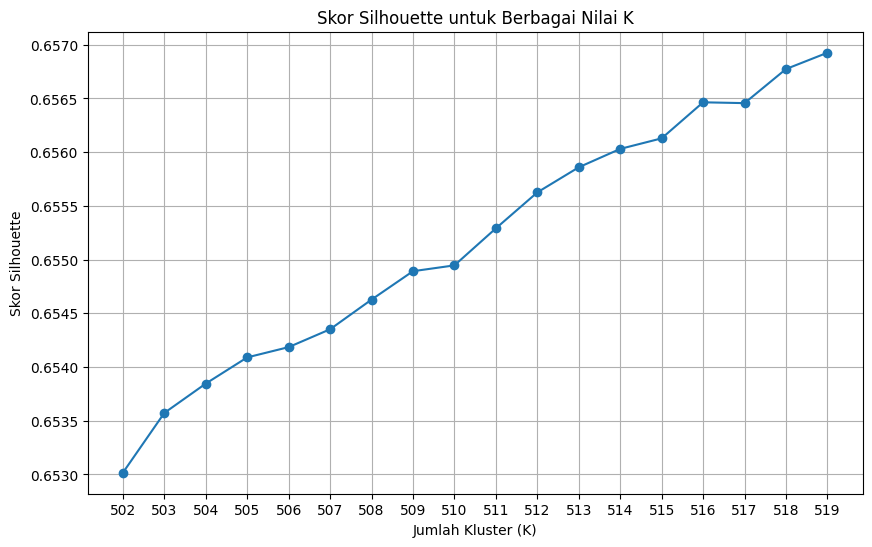

In [ ]:
# Inisialisasi daftar untuk menyimpan skor silhouette untuk setiap nilai K
silhouette_scores = []
k_range = range(502, 520)  # Menyesuaikan rentang K untuk demonstrasi

# Menghitung skor silhouette untuk setiap nilai K
for k in k_range:
    # Membuat model KMeans dengan jumlah kluster sebanyak K
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Menerapkan klustering dan mendapatkan label kluster
    labels = kmeans.fit_predict(X_bert_id)

    # Menghitung skor silhouette untuk mengevaluasi kualitas klustering
    score = silhouette_score(X_bert_id, labels)

    # Menyimpan skor ke dalam daftar
    silhouette_scores.append(score)
    print(f"K={k}, Silhouette Score={score}")

# Menampilkan grafik skor silhouette untuk setiap nilai K
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Jumlah Kluster (K)")
plt.ylabel("Skor Silhouette")
plt.title("Skor Silhouette untuk Berbagai Nilai K")
plt.xticks(k_range)
plt.grid()
plt.show()

K=1002, Silhouette Score=0.7238735206898302
K=1003, Silhouette Score=0.72386110877137
K=1004, Silhouette Score=0.7239607544671525
K=1005, Silhouette Score=0.7240433533277119
K=1006, Silhouette Score=0.7241994977151642
K=1007, Silhouette Score=0.7242354474063898
K=1008, Silhouette Score=0.724190138964091
K=1009, Silhouette Score=0.7243036668392262
K=1010, Silhouette Score=0.7244188333182857
K=1011, Silhouette Score=0.7245028588659477
K=1012, Silhouette Score=0.7245438148884874
K=1013, Silhouette Score=0.7246027541596467
K=1014, Silhouette Score=0.7246491353229664
K=1015, Silhouette Score=0.7247305128185199
K=1016, Silhouette Score=0.7249166262835565
K=1017, Silhouette Score=0.7251565654759861
K=1018, Silhouette Score=0.7252038594997436
K=1019, Silhouette Score=0.7254451684960009


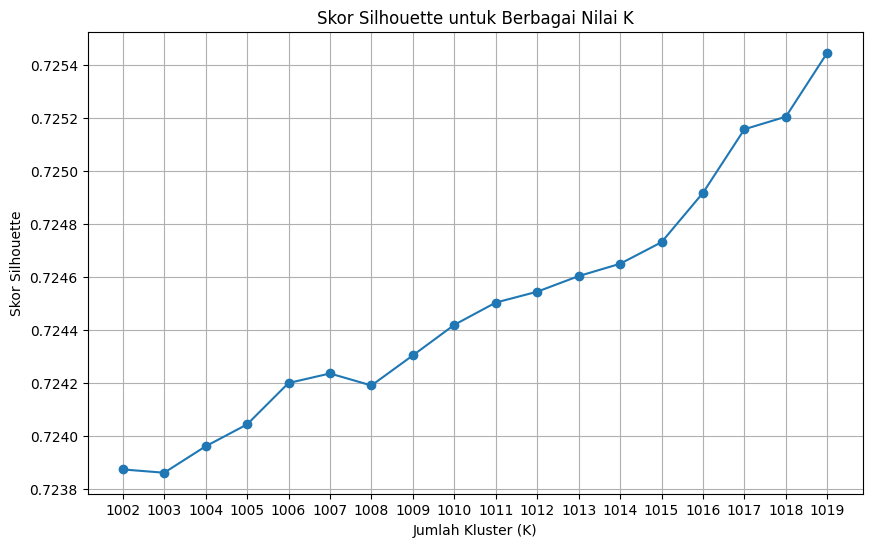

In [ ]:
# Inisialisasi daftar untuk menyimpan skor silhouette untuk setiap nilai K
silhouette_scores = []
k_range = range(1002, 1020)  # Menyesuaikan rentang K untuk demonstrasi

# Menghitung skor silhouette untuk setiap nilai K
for k in k_range:
    # Membuat model KMeans dengan jumlah kluster sebanyak K
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Menerapkan klustering dan mendapatkan label kluster
    labels = kmeans.fit_predict(X_bert_id)

    # Menghitung skor silhouette untuk mengevaluasi kualitas klustering
    score = silhouette_score(X_bert_id, labels)

    # Menyimpan skor ke dalam daftar
    silhouette_scores.append(score)
    print(f"K={k}, Silhouette Score={score}")

# Menampilkan grafik skor silhouette untuk setiap nilai K
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Jumlah Kluster (K)")
plt.ylabel("Skor Silhouette")
plt.title("Skor Silhouette untuk Berbagai Nilai K")
plt.xticks(k_range)
plt.grid()
plt.show()

# BERT MULTI

K=2, Silhouette Score=0.17689595944095585
K=3, Silhouette Score=0.1784791534145438
K=4, Silhouette Score=0.18850966360352375
K=5, Silhouette Score=0.19167791429146316
K=6, Silhouette Score=0.19708396505254205
K=7, Silhouette Score=0.19982597180176095
K=8, Silhouette Score=0.24384479583565982
K=9, Silhouette Score=0.24514969153671712
K=10, Silhouette Score=0.2518417945077532
K=11, Silhouette Score=0.2561920138481406
K=12, Silhouette Score=0.2600574921112988
K=13, Silhouette Score=0.26577252664465506
K=14, Silhouette Score=0.2691623923731885
K=15, Silhouette Score=0.27770945688771637
K=16, Silhouette Score=0.28118975460337386
K=17, Silhouette Score=0.2856570911613565
K=18, Silhouette Score=0.28869627451852664
K=19, Silhouette Score=0.29201137998207877


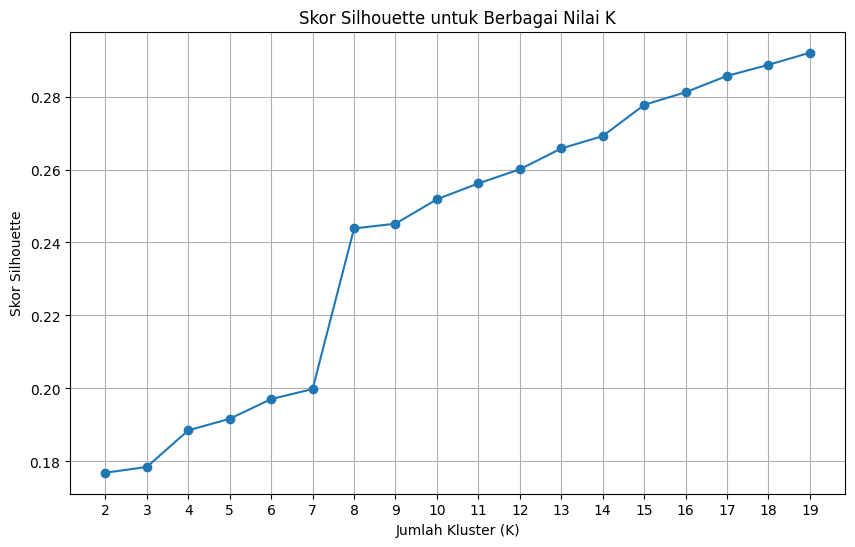

In [ ]:
# Inisialisasi daftar untuk menyimpan skor silhouette untuk setiap nilai K
silhouette_scores = []
k_range = range(2, 20)  # Menyesuaikan rentang K untuk demonstrasi

# Menghitung skor silhouette untuk setiap nilai K
for k in k_range:
    # Membuat model KMeans dengan jumlah kluster sebanyak K
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Menerapkan klustering dan mendapatkan label kluster
    labels = kmeans.fit_predict(X_bert_multi)

    # Menghitung skor silhouette untuk mengevaluasi kualitas klustering
    score = silhouette_score(X_bert_multi, labels)

    # Menyimpan skor ke dalam daftar
    silhouette_scores.append(score)
    print(f"K={k}, Silhouette Score={score}")

# Menampilkan grafik skor silhouette untuk setiap nilai K
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Jumlah Kluster (K)")
plt.ylabel("Skor Silhouette")
plt.title("Skor Silhouette untuk Berbagai Nilai K")
plt.xticks(k_range)
plt.grid()
plt.show()

K=1002, Silhouette Score=0.7465316160751765
K=1003, Silhouette Score=0.7465787823709558
K=1004, Silhouette Score=0.7466558730705147
K=1005, Silhouette Score=0.7467196492225878
K=1006, Silhouette Score=0.7467956780900178
K=1007, Silhouette Score=0.7468204515031103
K=1008, Silhouette Score=0.7469176041320228
K=1009, Silhouette Score=0.7469921981774068
K=1010, Silhouette Score=0.7470966488913354
K=1011, Silhouette Score=0.7470881695621957
K=1012, Silhouette Score=0.7471824294713406
K=1013, Silhouette Score=0.74708448266179
K=1014, Silhouette Score=0.7471753429914292
K=1015, Silhouette Score=0.7472265107426429
K=1016, Silhouette Score=0.7472884286971232
K=1017, Silhouette Score=0.7474049778544922
K=1018, Silhouette Score=0.7474382145577776
K=1019, Silhouette Score=0.7473928943541711


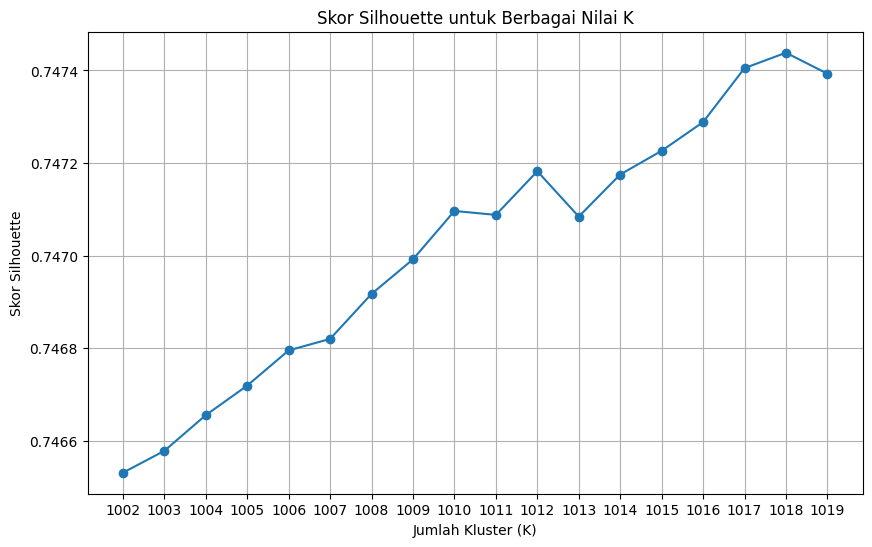

In [ ]:
# Inisialisasi daftar untuk menyimpan skor silhouette untuk setiap nilai K
silhouette_scores = []
k_range = range(1002, 1020)  # Menyesuaikan rentang K untuk demonstrasi

# Menghitung skor silhouette untuk setiap nilai K
for k in k_range:
    # Membuat model KMeans dengan jumlah kluster sebanyak K
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Menerapkan klustering dan mendapatkan label kluster
    labels = kmeans.fit_predict(X_bert_multi)

    # Menghitung skor silhouette untuk mengevaluasi kualitas klustering
    score = silhouette_score(X_bert_multi, labels)

    # Menyimpan skor ke dalam daftar
    silhouette_scores.append(score)
    print(f"K={k}, Silhouette Score={score}")

# Menampilkan grafik skor silhouette untuk setiap nilai K
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Jumlah Kluster (K)")
plt.ylabel("Skor Silhouette")
plt.title("Skor Silhouette untuk Berbagai Nilai K")
plt.xticks(k_range)
plt.grid()
plt.show()

K=1002, Silhouette Score=0.7465316160751765
K=1003, Silhouette Score=0.7465787823709558
K=1004, Silhouette Score=0.7466558730705147
K=1005, Silhouette Score=0.7467196492225878
K=1006, Silhouette Score=0.7467956780900178
K=1007, Silhouette Score=0.7468204515031103
K=1008, Silhouette Score=0.7469176041320228
K=1009, Silhouette Score=0.7469921981774068
K=1010, Silhouette Score=0.7470966488913354
K=1011, Silhouette Score=0.7470881695621957
K=1012, Silhouette Score=0.7471824294713406
K=1013, Silhouette Score=0.74708448266179
K=1014, Silhouette Score=0.7471753429914292
K=1015, Silhouette Score=0.7472265107426429
K=1016, Silhouette Score=0.7472884286971232
K=1017, Silhouette Score=0.7474049778544922
K=1018, Silhouette Score=0.7474382145577776
K=1019, Silhouette Score=0.7473928943541711


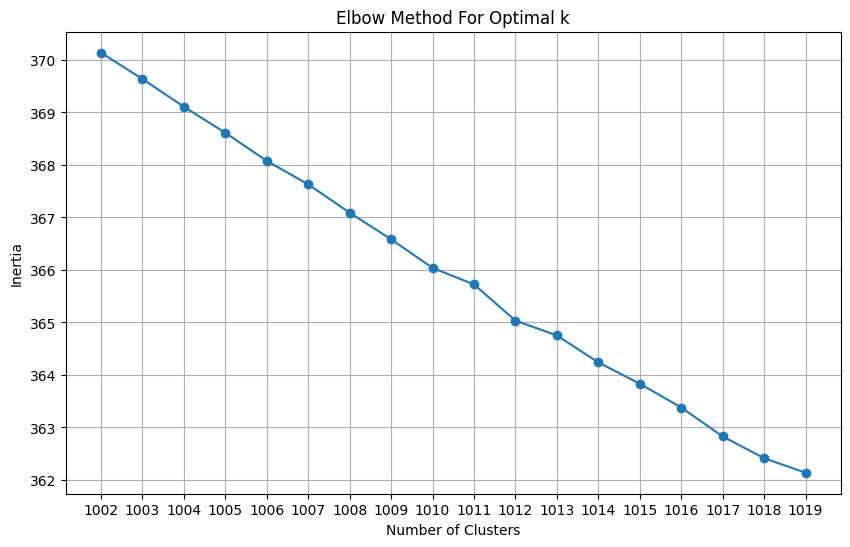

In [ ]:
inertia_values = []
cluster_range = range(1002, 1020)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_bert_multi)
    inertia_values.append(kmeans.inertia_)
    sil_score = silhouette_score(X_bert_multi, labels)
    print(f"K={n_clusters}, Silhouette Score={sil_score}")

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.xticks(cluster_range)
plt.grid()
plt.show()